# Unit Testing Self organising maps using KNN anomaly detection

In [2]:
import pandas as pd
import numpy as np
import json
import os

#importing the dependencies
from anomaly_detectors.som_knn_detector import som_knn_wrapper as som_wrapper
from anomaly_detectors.utils import csv_prep_for_reader as csv_helper

import warnings
warnings.filterwarnings('ignore')

In [3]:
% matplotlib inline
%load_ext autoreload
%autoreload 2

In [16]:
reader_kwargs = lambda :{
            'filepath'   :'../../dataset/sample_csv_files/alcohol-demand-log-spirits-consu.csv',
            'filename'   :'alcohol-demand-log-spirits-consu.csv',
            'target_dir' :'../../dataset/reader_csv_files/',
            'assetno'    :'A1',
            'n_rows'     :None,
            'has_time'   :True
            }

assetno= ['A1']

model_input_args = lambda :{
    'network_shape':(8,8),
    'input_feature_size':None,
    'time_constant':None,
    'minNumPerBmu':2,
    'no_of_neighbours':3,
    'init_radius':0.4,
    'init_learning_rate':0.01,
    'N':100,    
    'diff_order':1
}

training_args = lambda:{
            'is_train':True,
            'epochs':5,
            'batch_size':4,
            'to_plot':True,
            'test_frac':0.2
        }


        
eval_args = lambda: {
    'model_path':'',
    'to_plot':True,
    'anom_thres':3.0
}

In [17]:
keys = list(model_input_args().keys())+list(training_args().keys())+list(eval_args().keys())

In [18]:
keys

['network_shape',
 'input_feature_size',
 'time_constant',
 'minNumPerBmu',
 'no_of_neighbours',
 'init_radius',
 'init_learning_rate',
 'N',
 'diff_order',
 'is_train',
 'epochs',
 'batch_size',
 'to_plot',
 'test_frac',
 'model_path',
 'to_plot',
 'anom_thres']

In [19]:
def get_kwargs():
    return model_input_args(),training_args(),eval_args()

## Test 1 : 
#### Testing with parameters being empty quotes

In [9]:
reader_kwargs1= reader_kwargs()
filepath,params = csv_helper.preparecsvtoread(**reader_kwargs1)
model_input_args1,training_args1,eval_args1 = get_kwargs()

## Testing on model_input_args

In [10]:
for key in list(model_input_args1.keys()):
    print("\nGiving {} parameter : ''\n".format(key))
    model_input_args1 = model_input_args()
    model_input_args1[key] = ''
    training_args1['to_plot']=False
    train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},filepath=filepath))
    print(train_res)


Giving network_shape parameter : ''

{'code': '400', 'status': 'Bad Request', 'message': "should be of type <class 'tuple'>", 'data': {'argument': 'som_shape', 'value': ''}}

Giving input_feature_size parameter : ''

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: A1 
                assetno  \
timestamp                
-3147897600000      A1   
-3137356800000      A1   
-3126816000000      A1   
-3116361600000      A1   
-3105820800000      A1   

                Alcohol demand (log spirits consumption per head), UK, 1870-1938  
timestamp                                                                         
-3147897600000                                           0.026580                 
-3137356800000                                           0.114869                 
-3126816000000                                           0.247302                 
-3116361600000                                           0.379735                 
-3105820800

## Testing on training args

In [11]:
model_input_args1 = model_input_args()

for key in list(training_args().keys()):
    training_args1 = training_args()
    training_args1[key] = ''
#     eval_args1['to_plot']=False
    training_args1['to_plot']=False    

    train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},filepath=filepath))
    print(train_res)

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: A1 
                assetno  \
timestamp                
-3147897600000      A1   
-3137356800000      A1   
-3126816000000      A1   
-3116361600000      A1   
-3105820800000      A1   

                Alcohol demand (log spirits consumption per head), UK, 1870-1938  
timestamp                                                                         
-3147897600000                                           0.026580                 
-3137356800000                                           0.114869                 
-3126816000000                                           0.247302                 
-3116361600000                                           0.379735                 
-3105820800000                                           0.423880                 

Shape of the Entire dataset : torch.Size([207, 1])

Shape of Training dataset :torch.Size([166, 1]) and Test dataset :torch.Size([42, 1])

Networ

## Testing on evaluation args

In [14]:
training_args1 = training_args()
model_input_args1 = model_input_args()
training_args1['to_plot']=False
train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},filepath=filepath))
print(train_res)

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: A1 
                assetno  \
timestamp                
-3147897600000      A1   
-3137356800000      A1   
-3126816000000      A1   
-3116361600000      A1   
-3105820800000      A1   

                Alcohol demand (log spirits consumption per head), UK, 1870-1938  
timestamp                                                                         
-3147897600000                                           0.026580                 
-3137356800000                                           0.114869                 
-3126816000000                                           0.247302                 
-3116361600000                                           0.379735                 
-3105820800000                                           0.423880                 

Shape of the Entire dataset : torch.Size([207, 1])

Shape of Training dataset :torch.Size([166, 1]) and Test dataset :torch.Size([42, 1])

Networ

In [20]:
for key in list(eval_args().keys()):
    eval_args1 = eval_args()
    eval_args1['model_path'] = train_res['models'][0][assetno[0]]
    eval_args1[key] = ''
#     json_data = reader_helper.read(reader_kwargs1)
    eval_args1['to_plot']=False
    test_res = som_wrapper.evaluate(**eval_args1,filepath=filepath)
    print(test_res)

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: A1 
                assetno  \
timestamp                
-3147897600000      A1   
-3137356800000      A1   
-3126816000000      A1   
-3116361600000      A1   
-3105820800000      A1   

                Alcohol demand (log spirits consumption per head), UK, 1870-1938  
timestamp                                                                         
-3147897600000                                           0.026580                 
-3137356800000                                           0.114869                 
-3126816000000                                           0.247302                 
-3116361600000                                           0.379735                 
-3105820800000                                           0.423880                 

Shape of the Entire dataset : torch.Size([207, 1])

{"code": "500", "status": "Unknown Exception", "message": "[Errno 2] No such file or director

Traceback (most recent call last):
  File "/home/rohithram/Desktop/internship/sprint1/git_som_code/rohithram/anomaly_detectors/som_knn_detector/som_knn_wrapper.py", line 311, in evaluate
    anom_indexes = anomaly_detector.detect_anomalies()
  File "/home/rohithram/Desktop/internship/sprint1/git_som_code/rohithram/anomaly_detectors/som_knn_detector/som_knn_detector.py", line 134, in detect_anomalies
    eval_net = load_model(model_path)
  File "/home/rohithram/Desktop/internship/sprint1/git_som_code/rohithram/anomaly_detectors/som_knn_detector/som_knn_detector.py", line 75, in load_model
    filehandler = open(filepath, 'rb')
FileNotFoundError: [Errno 2] No such file or directory: ''


## Test 2 :
#### Testing missing parameters : 
* Since only model path is required arg, it doesn't throw any error when we don't pass other evalution args since they are optional

#### Model input args

In [21]:
for key in list(model_input_args1.keys()):
    print("\nGiving {} parameter : ''\n".format(key))
    model_input_args1 = model_input_args()
    del model_input_args1[key]
    training_args1['to_plot']=False
    train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},filepath=filepath))
    print(train_res)


Giving network_shape parameter : ''

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: A1 
                assetno  \
timestamp                
-3147897600000      A1   
-3137356800000      A1   
-3126816000000      A1   
-3116361600000      A1   
-3105820800000      A1   

                Alcohol demand (log spirits consumption per head), UK, 1870-1938  
timestamp                                                                         
-3147897600000                                           0.026580                 
-3137356800000                                           0.114869                 
-3126816000000                                           0.247302                 
-3116361600000                                           0.379735                 
-3105820800000                                           0.423880                 

Shape of the Entire dataset : torch.Size([207, 1])

Shape of Training dataset :torch.Size([166, 1]) and Tes


 Training successfully completed 


Saved model : som_trained_model_AlcoholdemandlogspiritsconsumptionperheadUK18701938_A1_1531771393730 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1531771393730

{'header': {'code': '200', 'status': 'OK'}, 'models': [{'A1': '../../Anomaly_Detection_Models/Machine_Learning_Models/som_trained_model_AlcoholdemandlogspiritsconsumptionperheadUK18701938_A1_1531771393730'}]}

Giving init_learning_rate parameter : ''

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: A1 
                assetno  \
timestamp                
-3147897600000      A1   
-3137356800000      A1   
-3126816000000      A1   
-3116361600000      A1   
-3105820800000      A1   

                Alcohol demand (log spirits consumption per head), UK, 1870-1938  
timestamp                                                                         
-3147897600000                                           0.026580          

#### Training args


Giving is_train parameter : ''

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: A1 
                assetno  \
timestamp                
-3147897600000      A1   
-3137356800000      A1   
-3126816000000      A1   
-3116361600000      A1   
-3105820800000      A1   

                Alcohol demand (log spirits consumption per head), UK, 1870-1938  
timestamp                                                                         
-3147897600000                                           0.026580                 
-3137356800000                                           0.114869                 
-3126816000000                                           0.247302                 
-3116361600000                                           0.379735                 
-3105820800000                                           0.423880                 

Shape of the Entire dataset : torch.Size([207, 1])

Shape of Training dataset :torch.Size([166, 1]) and Test dat

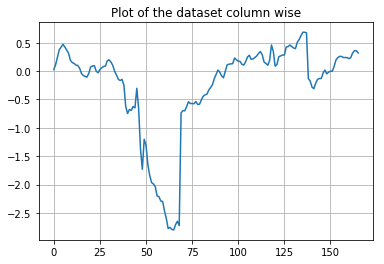

Network dimensions are 8 x 7 


Shape of differenced Training data : (165, 1)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed


 Training successfully completed 


Saved model : som_trained_model_AlcoholdemandlogspiritsconsumptionperheadUK18701938_A1_1531771409430 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1531771409430

{'header': {'code': '200', 'status': 'OK'}, 'models': [{'A1': '../../Anomaly_Detection_Models/Machine_Learning_Models/som_trained_model_AlcoholdemandlogspiritsconsumptionperheadUK18701938_A1_1531771409430'}]}

Giving test_frac parameter : ''

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: A1 
                assetno  \
timestamp                
-3147897600000      A1   
-3137356800000      A1   
-3126816000000      A1   
-3116361600000      A1   
-3105820800000      A1   

                Alcohol demand (log spirits consumption per head), UK, 1870-1938  
time

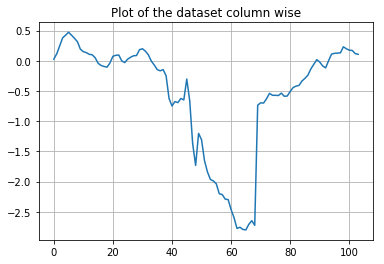

Network dimensions are 8 x 7 


Shape of differenced Training data : (103, 1)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed


 Training successfully completed 


Saved model : som_trained_model_AlcoholdemandlogspiritsconsumptionperheadUK18701938_A1_1531771409776 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1531771409776

{'header': {'code': '200', 'status': 'OK'}, 'models': [{'A1': '../../Anomaly_Detection_Models/Machine_Learning_Models/som_trained_model_AlcoholdemandlogspiritsconsumptionperheadUK18701938_A1_1531771409776'}]}


In [22]:
for key in list(training_args1.keys()):
    print("\nGiving {} parameter : ''\n".format(key))
    model_input_args1 = model_input_args()
    del training_args1[key]
#     training_args1['to_plot']=False
    train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},filepath=filepath))
    print(train_res)

#### Evaluation args

In [23]:
for key in list(eval_args().keys()):
    eval_args1 = eval_args()
    del eval_args1[key]
    eval_args1['model_path'] = train_res['models'][0][assetno[0]]

#     json_data = reader_helper.read(reader_kwargs1)
    eval_args1['to_plot']=False
    test_res = som_wrapper.evaluate(**eval_args1,filepath=filepath)
    print(test_res)

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: A1 
                assetno  \
timestamp                
-3147897600000      A1   
-3137356800000      A1   
-3126816000000      A1   
-3116361600000      A1   
-3105820800000      A1   

                Alcohol demand (log spirits consumption per head), UK, 1870-1938  
timestamp                                                                         
-3147897600000                                           0.026580                 
-3137356800000                                           0.114869                 
-3126816000000                                           0.247302                 
-3116361600000                                           0.379735                 
-3105820800000                                           0.423880                 

Shape of the Entire dataset : torch.Size([207, 1])

Input data's shape: (207, 1)
Differenced data shape (206, 1)
(206,)

No of anomalies detected

## Test 3:
#### Testing parameter type mismatch 

### Mismatched params arguments

In [24]:
train_vals = {'batch_size': 4.5,
             'epochs': 5.5,
             'is_train': 'True',
             'test_frac': 3.0,
             'to_plot': 'True'}

model_vals = {'N': '100',
             'diff_order': 1.4,
             'init_learning_rate': 1,
             'init_radius': 'f',
             'input_feature_size': 'ff',
             'minNumPerBmu': 2,
             'network_shape': ('8', 8),
             'no_of_neighbours': 34.4,
             'time_constant': 'None'}

eval_vals = {
            'model_path':34,
            'to_plot':'True',
            'anom_thres':4
}

####  Testing training args


Giving is_train parameter : True

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: A1 
                assetno  \
timestamp                
-3147897600000      A1   
-3137356800000      A1   
-3126816000000      A1   
-3116361600000      A1   
-3105820800000      A1   

                Alcohol demand (log spirits consumption per head), UK, 1870-1938  
timestamp                                                                         
-3147897600000                                           0.026580                 
-3137356800000                                           0.114869                 
-3126816000000                                           0.247302                 
-3116361600000                                           0.379735                 
-3105820800000                                           0.423880                 

Shape of the Entire dataset : torch.Size([207, 1])

Shape of Training dataset :torch.Size([166, 1]) and Test d

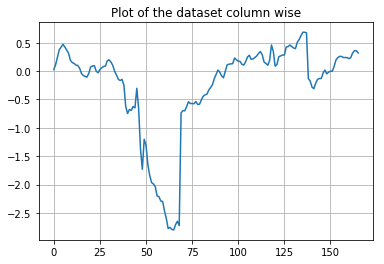

Network dimensions are 8 x 7 


Shape of differenced Training data : (165, 1)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed

Epoch : 4 completed


 Training successfully completed 


Saved model : som_trained_model_AlcoholdemandlogspiritsconsumptionperheadUK18701938_A1_1531771470614 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1531771470614

{'header': {'code': '200', 'status': 'OK'}, 'models': [{'A1': '../../Anomaly_Detection_Models/Machine_Learning_Models/som_trained_model_AlcoholdemandlogspiritsconsumptionperheadUK18701938_A1_1531771470614'}]}

Giving epochs parameter : 5.5

{'code': '400', 'status': 'Bad Request', 'message': "should be of type <class 'int'>", 'data': {'argument': 'epochs', 'value': 5.5}}

Giving batch_size parameter : 4.5

{'code': '400', 'status': 'Bad Request', 'message': "should be of type <class 'int'>", 'data': {'argument': 'batch_size', 'value': 4.5}}

Giving to_plot parameter : True

{

Traceback (most recent call last):
  File "/home/rohithram/Desktop/internship/sprint1/git_som_code/rohithram/anomaly_detectors/som_knn_detector/som_knn_wrapper.py", line 198, in train
    model_path = (anomaly_detector.detect_anomalies())
  File "/home/rohithram/Desktop/internship/sprint1/git_som_code/rohithram/anomaly_detectors/som_knn_detector/som_knn_detector.py", line 123, in detect_anomalies
    to_plot=self.training_args['to_plot'])
  File "/home/rohithram/Desktop/internship/sprint1/git_som_code/rohithram/anomaly_detectors/som_knn_detector/som_knn_detector.py", line 194, in process_data
    train_data,test_data = split_the_data(data_set,test_frac=test_frac)
  File "/home/rohithram/Desktop/internship/sprint1/git_som_code/rohithram/anomaly_detectors/som_knn_detector/som_knn_detector.py", line 168, in split_the_data
    train_data = data[0:int(np.ceil((1-test_frac)*data[:,].shape[0])),:]
  File "/home/rohithram/Desktop/internship/sprint1/git_som_code/rohithram/anomaly_detectors/som_

In [25]:
for i,key in enumerate(list(training_args().keys())):
    print("\nGiving {} parameter : {}\n".format(key,train_vals[key]))
    model_input_args1 = model_input_args()
    training_args1 = training_args()
    training_args1[key] = train_vals[key]
    train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},filepath=filepath))
    print(train_res)

####  Testing model input args


Giving network_shape parameter : ('8', 8)

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: A1 
                assetno  \
timestamp                
-3147897600000      A1   
-3137356800000      A1   
-3126816000000      A1   
-3116361600000      A1   
-3105820800000      A1   

                Alcohol demand (log spirits consumption per head), UK, 1870-1938  
timestamp                                                                         
-3147897600000                                           0.026580                 
-3137356800000                                           0.114869                 
-3126816000000                                           0.247302                 
-3116361600000                                           0.379735                 
-3105820800000                                           0.423880                 

Shape of the Entire dataset : torch.Size([207, 1])

Shape of Training dataset :torch.Size([166, 1]) a

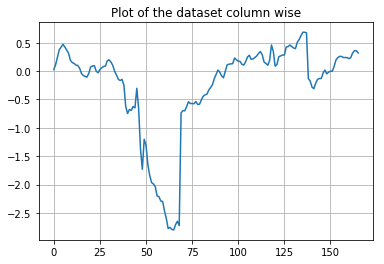

Network dimensions are 8 x 7 

{'code': '500', 'status': 'Unknown Exception', 'message': 'an integer is required (got type str)'}

Giving input_feature_size parameter : ff

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: A1 
                assetno  \
timestamp                
-3147897600000      A1   
-3137356800000      A1   
-3126816000000      A1   
-3116361600000      A1   
-3105820800000      A1   

                Alcohol demand (log spirits consumption per head), UK, 1870-1938  
timestamp                                                                         
-3147897600000                                           0.026580                 
-3137356800000                                           0.114869                 
-3126816000000                                           0.247302                 
-3116361600000                                           0.379735                 
-3105820800000                                          

Traceback (most recent call last):
  File "/home/rohithram/Desktop/internship/sprint1/git_som_code/rohithram/anomaly_detectors/som_knn_detector/som_knn_wrapper.py", line 198, in train
    model_path = (anomaly_detector.detect_anomalies())
  File "/home/rohithram/Desktop/internship/sprint1/git_som_code/rohithram/anomaly_detectors/som_knn_detector/som_knn_detector.py", line 127, in detect_anomalies
    net = create_cum_train_som(train_data,self.model_input_args,self.training_args)
  File "/home/rohithram/Desktop/internship/sprint1/git_som_code/rohithram/anomaly_detectors/som_knn_detector/som_knn_detector.py", line 399, in create_cum_train_som
    model = som_knn_module.Som_model(**model_input_args)
  File "/home/rohithram/Desktop/internship/sprint1/git_som_code/rohithram/anomaly_detectors/som_knn_detector/som_knn_module.py", line 29, in __init__
    self.weights = torch.rand((*self.shape,self.feature_size),dtype=torch.float64)
TypeError: an integer is required (got type str)


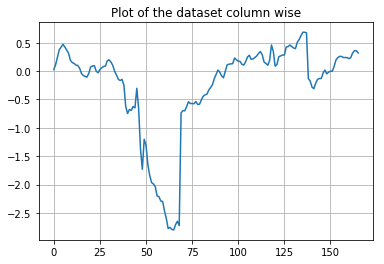

Network dimensions are 8 x 7 


Shape of differenced Training data : (165, 1)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed

Epoch : 4 completed


 Training successfully completed 


Saved model : som_trained_model_AlcoholdemandlogspiritsconsumptionperheadUK18701938_A1_1531771483891 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1531771483891

{'header': {'code': '200', 'status': 'OK'}, 'models': [{'A1': '../../Anomaly_Detection_Models/Machine_Learning_Models/som_trained_model_AlcoholdemandlogspiritsconsumptionperheadUK18701938_A1_1531771483891'}]}

Giving time_constant parameter : None

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: A1 
                assetno  \
timestamp                
-3147897600000      A1   
-3137356800000      A1   
-3126816000000      A1   
-3116361600000      A1   
-3105820800000      A1   

                Alcohol demand (log spirits consumption per 

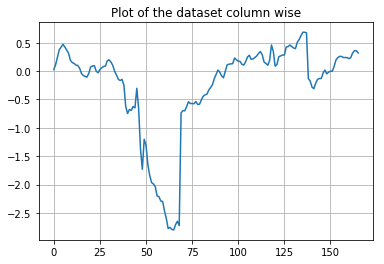

Network dimensions are 8 x 7 


Shape of differenced Training data : (165, 1)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed

Epoch : 4 completed


 Training successfully completed 


Saved model : som_trained_model_AlcoholdemandlogspiritsconsumptionperheadUK18701938_A1_1531771484225 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1531771484225

{'header': {'code': '200', 'status': 'OK'}, 'models': [{'A1': '../../Anomaly_Detection_Models/Machine_Learning_Models/som_trained_model_AlcoholdemandlogspiritsconsumptionperheadUK18701938_A1_1531771484225'}]}

Giving minNumPerBmu parameter : 2

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: A1 
                assetno  \
timestamp                
-3147897600000      A1   
-3137356800000      A1   
-3126816000000      A1   
-3116361600000      A1   
-3105820800000      A1   

                Alcohol demand (log spirits consumption per head

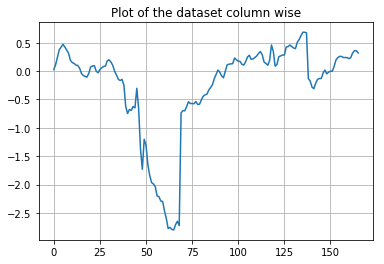

Network dimensions are 8 x 7 


Shape of differenced Training data : (165, 1)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed

Epoch : 4 completed


 Training successfully completed 


Saved model : som_trained_model_AlcoholdemandlogspiritsconsumptionperheadUK18701938_A1_1531771484578 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1531771484578

{'header': {'code': '200', 'status': 'OK'}, 'models': [{'A1': '../../Anomaly_Detection_Models/Machine_Learning_Models/som_trained_model_AlcoholdemandlogspiritsconsumptionperheadUK18701938_A1_1531771484578'}]}

Giving no_of_neighbours parameter : 34.4

{'code': '400', 'status': 'Bad Request', 'message': "should be of type <class 'int'>", 'data': {'argument': 'no_of_neighbors', 'value': 34.4}}

Giving init_radius parameter : f

{'code': '400', 'status': 'Bad Request', 'message': "should be of type <class 'float'>", 'data': {'argument': 'initial_radius', 'value': 'f'}}

Giving i

In [27]:
for i,key in enumerate(list(model_input_args().keys())):
    print("\nGiving {} parameter : {}\n".format(key,model_vals[key]))
    training_args1 = training_args()
    model_input_args1 = model_input_args()
    model_input_args1[key] = model_vals[key]
    train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},filepath=filepath))
    print(train_res)

#### Testing eval args

In [28]:
training_args1 = training_args()
model_input_args1 = model_input_args()
training_args1['to_plot'] = False

train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},filepath=filepath))

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: A1 
                assetno  \
timestamp                
-3147897600000      A1   
-3137356800000      A1   
-3126816000000      A1   
-3116361600000      A1   
-3105820800000      A1   

                Alcohol demand (log spirits consumption per head), UK, 1870-1938  
timestamp                                                                         
-3147897600000                                           0.026580                 
-3137356800000                                           0.114869                 
-3126816000000                                           0.247302                 
-3116361600000                                           0.379735                 
-3105820800000                                           0.423880                 

Shape of the Entire dataset : torch.Size([207, 1])

Shape of Training dataset :torch.Size([166, 1]) and Test dataset :torch.Size([42, 1])

Networ

In [30]:
eval_vals

{'anom_thres': 4, 'model_path': 34, 'to_plot': 'True'}

In [29]:
for key in list(eval_args().keys()):
    eval_args1 = eval_args()
    eval_args1[key] = eval_vals[key]

    test_res = som_wrapper.evaluate(**eval_args1,filepath=filepath)
    print(test_res)

{"code": "400", "status": "Bad Request", "message": "should be of type <class 'str'>", "data": {"argument": "model_path", "value": 34}}
{"code": "400", "status": "Bad Request", "message": "should be of type <class 'bool'>", "data": {"argument": "to_plot", "value": "True"}}
{"code": "400", "status": "Bad Request", "message": "should be of type <class 'float'>", "data": {"argument": "anom_thres", "value": 4}}


### User Defined Test Case:
#### Testing the data missing case

In [31]:
model_input_args1 = model_input_args()
training_args1 = training_args()
training_args1['to_plot']=False
train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},filepath='filepath'))
print(train_res)

Data reader initialised 

{'code': '400', 'status': 'Bad Request', 'message': "File b'filepath' does not exist,filepath", 'data': {}}


## Test 11:
#### Testing High Performance :

In [32]:
filepath,params= csv_helper.preparecsvtoread(filepath='../../dataset/bearings.csv',
                                            filename='bearings.csv',has_time=False)

model_input_args1,training_args1,eval_args1 = get_kwargs()

In [36]:
%%timeit -n 1 -r 1

training_args1['to_plot']=False
training_args1['epochs']= 10
training_args1['batch_size'] = 32
train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},filepath=filepath))

eval_args1['anom_thres'] = 3.0
eval_args1['model_path'] = train_res['models'][0][assetno[0]]
eval_args1['to_plot']=False
test_res = som_wrapper.evaluate(**eval_args1,filepath=filepath)
print(test_res)

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: A1 
             assetno         0         1         2         3         4  \
timestamp                                                               
18880200000      A1  1.441895 -0.803357  1.352302  1.589216  1.034719   
18880800000      A1  0.277494 -0.160994  1.054745  1.901840 -0.911613   
18881400000      A1 -0.412103  0.691120  0.569836  1.393826  0.007488   
18882000000      A1 -0.378189 -0.357636  1.076786  1.719476  0.007488   
18882600000      A1  1.328847 -0.449402 -0.532229  0.091225  0.753582   

                    5         6         7  
timestamp                                  
18880200000 -0.289267  0.910978 -0.847651  
18880800000 -0.392270  0.224991  0.600962  
18881400000 -0.268666 -1.412023 -0.108858  
18882000000 -1.999118 -0.991077  0.036003  
18882600000  0.112445 -0.570130 -0.079886  

Shape of the Entire dataset : torch.Size([20480, 8])

Shape of Training dataset :torch.Si

# Conclusion:
* Hence we observe that **Bayesian Changepoint Detection** works well only on level shifts or variational shift datasets over outlier or surge,sag datasets